In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Taxa de Inadimplência de Crédito

Este trabalho visa analisar as taxas de inadimplência de entidades brasileiras, aplicando técnicas de ciência de dados para extrair insights relevantes e contribuir para a melhoria das estratégias de gestão de risco. Os dados utilizados neste estudo foram coletados e fornecidos por instituições do Sistema Financeiro Nacional (SFN) e estavam alocados no site [Kaggle](https://www.kaggle.com/datasets/ex0ticone/credit-default-rates-of-brazilian-entities), uma plataforma que armazena bancos de dados para fins de estudo, voltada para cientistas de dados.

In [2]:
dados = pd.read_csv('./dados/default_rates.csv')
dados

,year_month,person_or_corporation,state_brazil,default_rate
0,2004-01-01,P,AC,4.98
1,2004-01-01,P,AL,8.33
2,2004-01-01,P,AP,4.82
3,2004-01-01,P,AM,9.18
4,2004-01-01,P,BA,9.48
...,...,...,...,...
13171,2024-04-01,C,RR,4.26
13172,2024-04-01,C,SC,1.99
13173,2024-04-01,C,SP,2.31
13174,2024-04-01,C,SE,3.65


O DataFrame possui 13.175 registros distribuídos em quatro colunas. As colunas são variáveis a serem estudadas. A seguir, encontram-se as definições de cada uma dessas variáveis:

## Definição das colunas:
+ **year_month**: Mês e ano da inserção dos dados.
+ **person_or_corporation**: Indica se os dados correspondem a uma conta pessoal ou corporativa.
+ **state_brazil**: Indica a que estado brasileiro os dados pertencem.
+ **default_rate**: Informa a taxa de inadimplência associada a cada registro.


### Calculo da taxa de inadimplência  
​$$Taxa =  \frac {\textit{Valores em atraso}}{\textit{Total a receber}}$$
 
\
Portanto, quanto menor for a taxa, melhor, pois isso significa que o valor em atraso é reduzido, resultando em uma condição financeira mais favorável.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_month             13176 non-null  object 
 1   person_or_corporation  13176 non-null  object 
 2   state_brazil           13176 non-null  object 
 3   default_rate           13176 non-null  float64
dtypes: float64(1), object(3)
memory usage: 411.9+ KB


In [4]:
dados.describe().round(2)

,default_rate
count,13176.00
mean,3.58
std,1.81
min,0.36
25%,2.25
50%,3.30
75%,4.53
max,16.76


In [5]:
dados.describe(include="object")

,year_month,person_or_corporation,state_brazil
count,13176,13176,13176
unique,244,2,27
top,2004-01-01,P,AC
freq,54,6588,488


É possível ver uma distribuição igualitária para cada tipo de variável, ou seja, a mesma quantidade de entradas para cada estado, assim como a mesma quantidade de entradas para cada tipo de conta e outras categorias. Outra observação é que não existem valores faltantes.

## Média da inadimplência por estado.

In [6]:
dados_por_estado = dados.groupby('state_brazil')['default_rate'].mean().round(2)
dados_por_estado=  dados_por_estado.sort_values(ascending=False)
dados_por_estado = pd.DataFrame(dados_por_estado)
dados_por_estado.reset_index(inplace=True)
dados_por_estado

,state_brazil,default_rate
0,MA,4.89
1,AL,4.51
2,PE,4.32
3,PA,4.31
4,PI,4.19
5,PB,4.14
6,BA,4.10
7,AM,4.08
8,SE,3.99
9,CE,3.94


In [7]:
def bar_graph(data,x,y, title=None, label_x=None,hue=None,width=0.8, figsize=(18,6), dodge='auto', legend_title=None,legend_label=None,):
    # Tamanho do gráfico 
    plt.figure(figsize=figsize)

    # Gráfico de barras
    ax = sns.barplot(
        data=data,
        x=data[x],
        y=data[y],
        hue=hue,
        width=width,
        dodge=dodge,
        palette='blend:#7ae582,#25a18e,#004e64',
        )
    
    #Título
    ax.set_title(title, fontdict={'fontsize':18},pad=20)

    # Retirar eixos do gráfico
    ax.set_frame_on(False)


    # Label x
    ax.set_xlabel(
        xlabel=label_x,
        fontdict={'fontsize':15}, labelpad=20)

    ax.tick_params(axis='x',
                length=0,
                labelsize=12,
                colors='#2D2D2D')

    if hue and dodge==False:
        ax.bar_label(ax.containers[0], fontsize=12, padding=5)
        ax.bar_label(ax.containers[1], fontsize=12, label_type='center', color='white')
            
    if hue and dodge=='auto':
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, padding=5)

    # Remoção do eixo y
    ax.get_yaxis().set_visible(False)
    
    # Legenda
    if legend_title and legend_label:
        new_title=legend_title
        ax.legend_.set_title(new_title)
        new_labels=legend_label
        for t, l in zip(ax.legend_.texts, new_labels):
            t.set_text(l)

    plt.show()

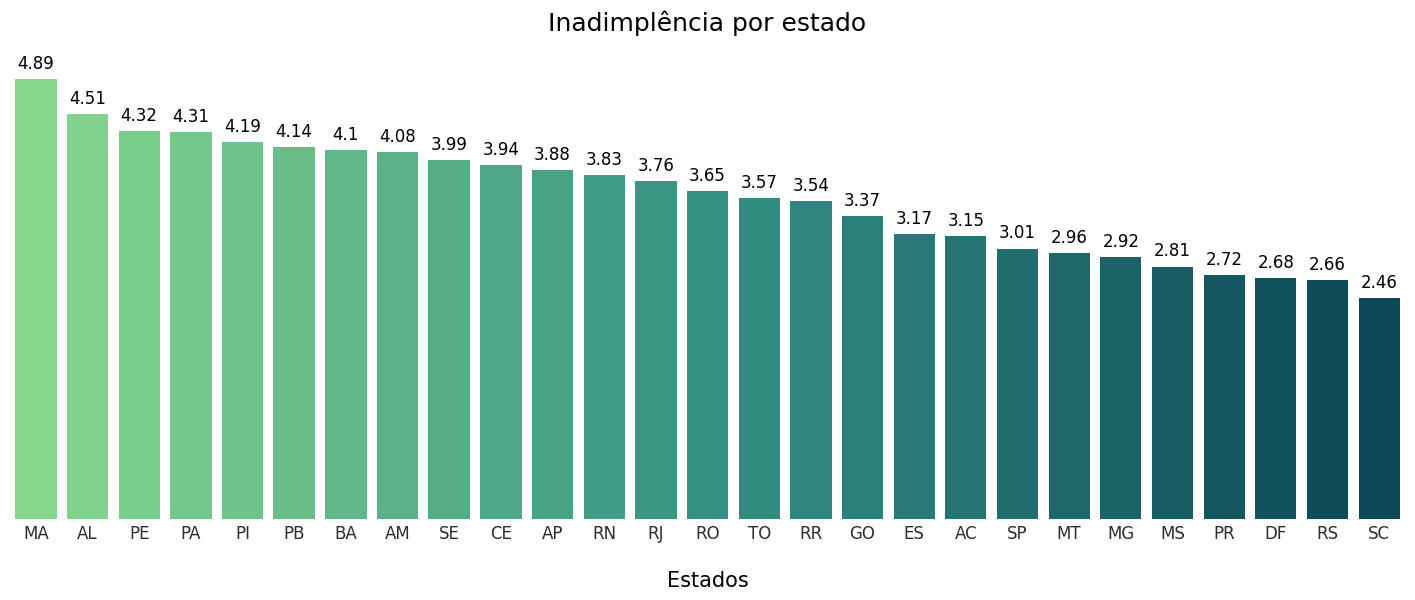

In [8]:
bar_graph(data=dados_por_estado, x='state_brazil',y='default_rate', title='Inadimplência por estado', label_x="Estados", hue='state_brazil')

In [9]:
dados_por_estado_tipo = dados.groupby(['person_or_corporation','state_brazil'])['default_rate'].mean().round(2)
dados_por_estado_tipo = dados_por_estado_tipo.reset_index().sort_values(by='default_rate', ascending=False)
dados_por_estado_tipo.reset_index(drop=True, inplace=True)
dados_por_estado_tipo

,person_or_corporation,state_brazil,default_rate
0,P,PE,6.06
1,P,MA,5.94
2,P,BA,5.70
3,P,AM,5.65
4,P,RJ,5.62
5,P,AL,5.57
6,P,PI,5.51
7,P,RR,5.47
8,P,CE,5.44
9,P,AP,5.19


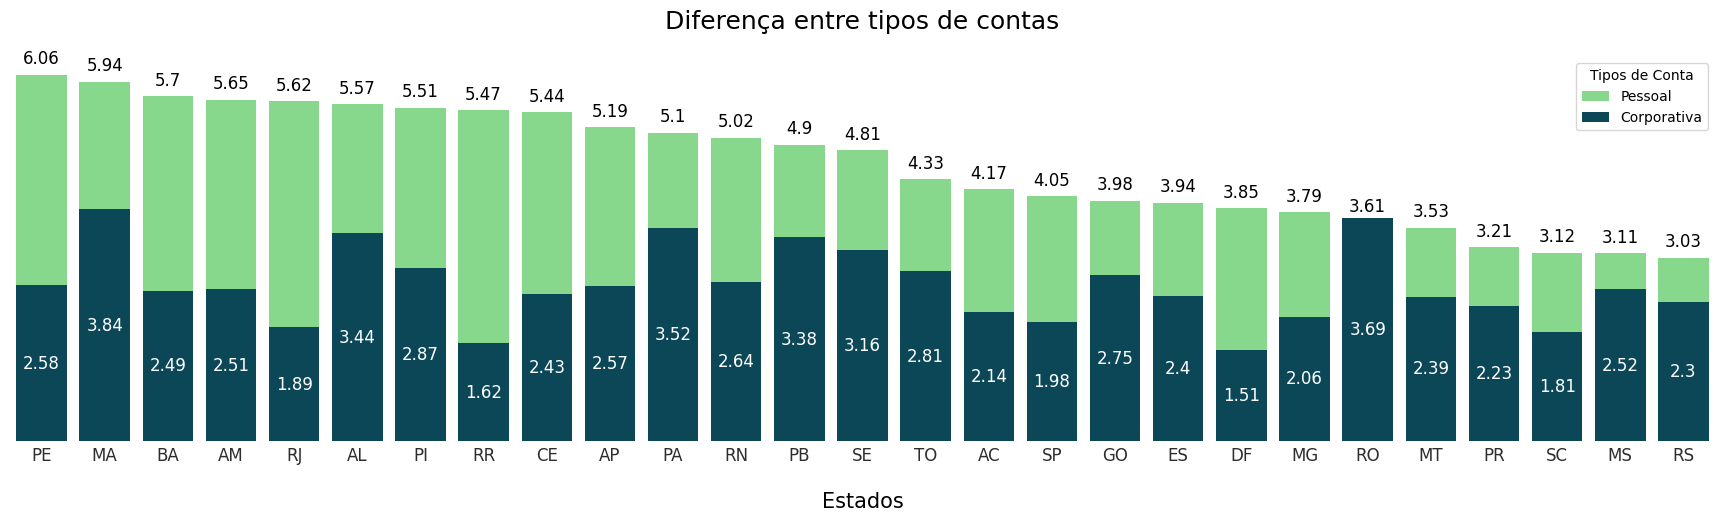

In [10]:
ax = bar_graph(
    dados_por_estado_tipo,
    x='state_brazil',
    y='default_rate',
    title='Diferença entre tipos de contas',
    label_x='Estados',
    hue='person_or_corporation',
    figsize=(22,5),
    dodge=False,
    legend_title="Tipos de Conta",
    legend_label=['Pessoal', 'Corporativa']
    )

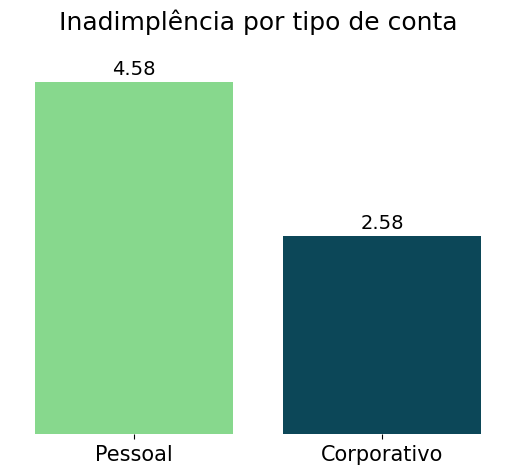

In [11]:
# plt.figure(figsize=(5,7))

ax = sns.barplot(
    data=dados,
    x=dados['person_or_corporation'],
    y=dados['default_rate'],
    errorbar=None,
    hue=dados['person_or_corporation'],
    palette='blend:#7ae582,#25a18e,#004e64',
    )

# Retirar eixos do gráfico
ax.set_frame_on(False)

#Título
ax.set_title('Inadimplência por tipo de conta', fontdict={'fontsize':18},pad=25)

# Retirar eixos do gráfico
ax.set_frame_on(False)


for container in ax.containers:
    ax.bar_label(container,fmt="%.2f", fontsize=14, padding=3)


# Label x
ax.set_xlabel("")
plt.xticks([0,1], ["Pessoal", 'Corporativo'], fontdict={'fontsize':15})


# Remoção do eixo y
ax.get_yaxis().set_visible(False)



plt.show()

## Média de inadimplência por ano

In [12]:
anos = [i[0] for i in dados['year_month'].str.split('-')]
dados['anos']=anos
dados

,year_month,person_or_corporation,state_brazil,default_rate,anos
0,2004-01-01,P,AC,4.98,2004
1,2004-01-01,P,AL,8.33,2004
2,2004-01-01,P,AP,4.82,2004
3,2004-01-01,P,AM,9.18,2004
4,2004-01-01,P,BA,9.48,2004
...,...,...,...,...,...
13171,2024-04-01,C,RR,4.26,2024
13172,2024-04-01,C,SC,1.99,2024
13173,2024-04-01,C,SP,2.31,2024
13174,2024-04-01,C,SE,3.65,2024


In [13]:
dados_por_ano = dados.groupby(by="anos")['default_rate'].mean().round(2)
dados_por_ano = pd.DataFrame(dados_por_ano)
dados_por_ano.reset_index(inplace=True)
dados_por_ano

,anos,default_rate
0,2004,4.54
1,2005,4.15
2,2006,4.43
3,2007,3.69
4,2008,3.51
5,2009,4.67
6,2010,4.05
7,2011,3.51
8,2012,3.94
9,2013,3.50


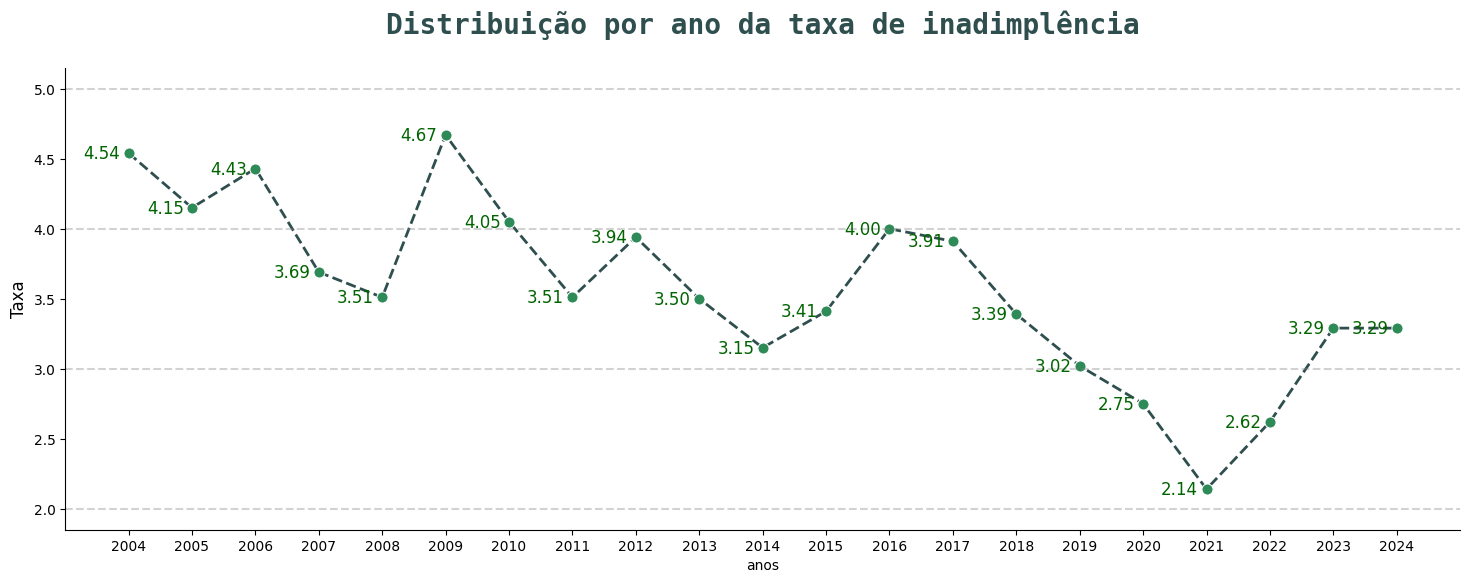

In [14]:
# Criando o gráfico
plt.subplots(figsize=(18,6))

# Retirando os eixos que não são importantes
sns.despine()

# Criação do Gráfico
ax=sns.lineplot(
    data=dados_por_ano,
    x=dados_por_ano['anos'],
    y=dados_por_ano['default_rate'],
    markers=True ,marker='o',
    linestyle='--', 
    linewidth=2,
    color='darkslategray',
    markersize=8,
    markerfacecolor='seagreen'
    )


#Obtendo valores de máximo e mínimo para o eixo y
y_max = ax.get_ylim()[1]
y_min = ax.get_ylim()[0]

#Criação das linhas no eixo y
for y in range(int(y_min),int(y_max) + 2):  
    ax.axhline(y=y, linestyle='--', color='gray', alpha=0.35)

# Marcadores
for x,y in zip(dados_por_ano['anos'],dados_por_ano['default_rate']):
    ax.annotate(f'{y:.2f}',
                xy=(x,y),
                xytext=(-6,-4),
                ha="right",
                textcoords='offset points',
                color='darkgreen',
                fontsize=12,
                )


# Titulo
ax.set_title("Distribuição por ano da taxa de inadimplência", fontdict={'fontsize':20, 'fontfamily':'monospace', 'color':'darkslategray', 'fontweight':'demibold'} ,pad=25)

# Eixo x
ax.set_ylabel('Ano', fontdict={'fontsize':12})


# Eixo y
ax.set_ylabel('Taxa', fontdict={'fontsize':12})

plt.show()

In [30]:
def state_graph(estado):

    # Plot da figura
    plt.figure(figsize=(15,5))
    ax=sns.lineplot(
        data=dados[dados['state_brazil']==f"{estado}"],
        x='anos',y='default_rate',
        marker='o',
        linestyle="--",
        color='darkslategray',
        )
    

    sns.despine()

    #Obtendo valores de máximo e mínimo para o eixo y
    y_max = ax.get_ylim()[1]
    y_min = ax.get_ylim()[0]

    #Criação das linhas no eixo y
    for y in range(int(y_min)+1,int(y_max) + 1):  
        ax.axhline(y=y, linestyle='--', color='gray', alpha=0.35)
    
    # Média de valores anual por estado
    yearly_means = dados[dados['state_brazil']==f"{estado}"].groupby('anos')['default_rate'].mean()
    

    # Titulo
    ax.set_title(f"Taxa de inadimplência por ano no estado de {estado}", fontdict={"fontsize":18} ,pad=20)

    # adicionar anotações com a média para cada ano
    for ano, mean in yearly_means.items():
        ax.annotate(
            f"{mean:.2f}",
            xy=(ano, mean), 
            xytext=(5, 10),
            color='darkgreen',
            textcoords="offset points",
            ha="center",
            va="bottom")
    
    # Eixo x
    ax.set_xlabel(
        xlabel=''
    )
    ax.tick_params(axis='x', labelsize=11)

    
    # Eixo y
    ax.set_ylabel(
        ylabel='Taxa',
        fontdict={'fontsize':12}
    )
    ax.tick_params(axis='y', labelsize=11)


    plt.show()

In [33]:
# Criando variável para cada estado
estados = list(dados['state_brazil'].unique())

# Criando o widgets
option1 = widgets.Dropdown(
    options=estados,
    layout=widgets.Layout(width="60%")
    )

# Criando a interação
widgets.interact(state_graph,estado=option1)
plt.show()

interactive(children=(Dropdown(description='estado', layout=Layout(width='60%'), options=('AC', 'AL', 'AP', 'A…

In [26]:
def comparison_chart(estados):
    # Criando o tamanho do plot
    dados_estados_por_anos = dados.query(f'state_brazil == "{estados}"')

    dados_estados_por_anos = dados_estados_por_anos[['anos','default_rate']].groupby(by='anos').mean()
    dados_estados_por_anos.reset_index(inplace=True)

    x0 = dados_por_ano['anos']
    y0 = dados_por_ano['default_rate']
    x1 = dados_estados_por_anos['anos']
    y1 = dados_estados_por_anos['default_rate']

    # Criando o gráfico
    plt.ion()
    _ , ax = plt.subplots(figsize=(16,6))

    plot1 = ax.plot(x0,y0,'D-.', color='red', alpha=0.65,markerfacecolor="red", label ='Total' )
    plot2 = ax.plot(x1,y1,'o--', color='#4C6D6D', alpha=0.55,markerfacecolor="#036A5F", label =f"{estados}")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
    # Criando os marcadores
    def pontos(x,y,color=None):
        for x,y in zip(x,y):
            ax.annotate(f'{y:.2f}',
                        xy=(x,y),
                        xytext=(-6,-4),
                        ha="right",
                        textcoords='offset points',
                        color=color
                        )

    # Marcadores
    pontos(x0,y0,'red')
    pontos(x1,y1)
    
    # Titulo
    ax.set_title(f"Comparação do estado {estados} com o Total",fontdict={'fontsize':12})

    #Obtendo valores de máximo e mínimo para o eixo y
    y_max = ax.get_ylim()[1]

    #Criação das linhas no eixo y
    for y in range(0,int(y_max) + 2):  
        ax.axhline(y=y, linestyle='--', color='gray', alpha=0.35)
    
    ax.axhline(y=0, linestyle='--', color='limegreen', alpha=0.75)

    # Legenda
    ax.legend(handles=[plot2[0],plot1[0]], loc="upper right")

    plt.show()

In [27]:
estados = list(dados['state_brazil'].unique())
menu = widgets.Dropdown(
    options=estados,
    layout=widgets.Layout(width='60%', grid_area='menu')
)

widgets.interact(comparison_chart, estados = menu)

plt.show()

interactive(children=(Dropdown(description='estados', layout=Layout(grid_area='menu', width='60%'), options=('…

In [57]:
def grafico_comparacao_entre_estados(estado1, estado2):
    # Criando o tamanho do plot
    dados_estados_por_anos_1 = dados.query(f'state_brazil == "{estado1}"')
    dados_estados_por_anos_2 = dados.query(f'state_brazil == "{estado2}"')

    dados_estados_por_anos_1 = dados_estados_por_anos_1[['anos','default_rate']].groupby(by='anos').mean()
    dados_estados_por_anos_1.reset_index(inplace=True)

    dados_estados_por_anos_2 = dados_estados_por_anos_2[['anos','default_rate']].groupby(by='anos').mean()
    dados_estados_por_anos_2.reset_index(inplace=True)

    x1 = dados_estados_por_anos_1['anos']
    y1 = dados_estados_por_anos_1['default_rate']
    x2 = dados_estados_por_anos_2['anos']
    y2 = dados_estados_por_anos_2['default_rate']

    # Criando o gráfico
    plt.ion()
    _, ax = plt.subplots(figsize=(15,6))

    plot1 = ax.plot(x1,y1,'v-', color='red', alpha=0.45,markerfacecolor="red", label =f"{estado1}" )
    plot2 = ax.plot(x2,y2,'o--', color='#0D3B30', alpha=0.45,markerfacecolor="#036A5F", label =f"{estado2}")

    #Obtendo valores de máximo e mínimo para o eixo y
    y_max = ax.get_ylim()[1]
    y_min = ax.get_ylim()[0]

    #Criação das linhas no eixo y
    for y in range(int(y_min),int(y_max) + 2):  
        ax.axhline(y=y, linestyle='--', color='gray', alpha=0.35)


    # Título e remoção dos eixos 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f"Comparação entre os estados {estado1} e {estado2}", fontdict={'fontsize':18}, pad=20)
    
    # Criando os Marcadores
    def pontos(x,y,color=None):
        for x,y in zip(x,y):
            ax.annotate(f'{y:.2f}',
                        xy=(x,y),
                        xytext=(-6,-4),
                        ha="right",
                        textcoords='offset points',
                        color=color
                        )

    pontos(x1,y1,'red')
    pontos(x2,y2)

    ax.legend(handles=[plot1[0],plot2[0]], loc='upper right')


    plt.show()

In [58]:
estados = list(dados['state_brazil'].unique())
menu1 = widgets.Dropdown(
    options=estados,
    layout=widgets.Layout(width='60%', grid_area='menu1')
)
menu2 = widgets.Dropdown(
    options=estados,
    layout=widgets.Layout(width='60%', grid_area='menu2')
)

widgets.interact(grafico_comparacao_entre_estados, estado1 = menu1, estado2 = menu2)

plt.show()

interactive(children=(Dropdown(description='estado1', layout=Layout(grid_area='menu1', width='60%'), options=(…

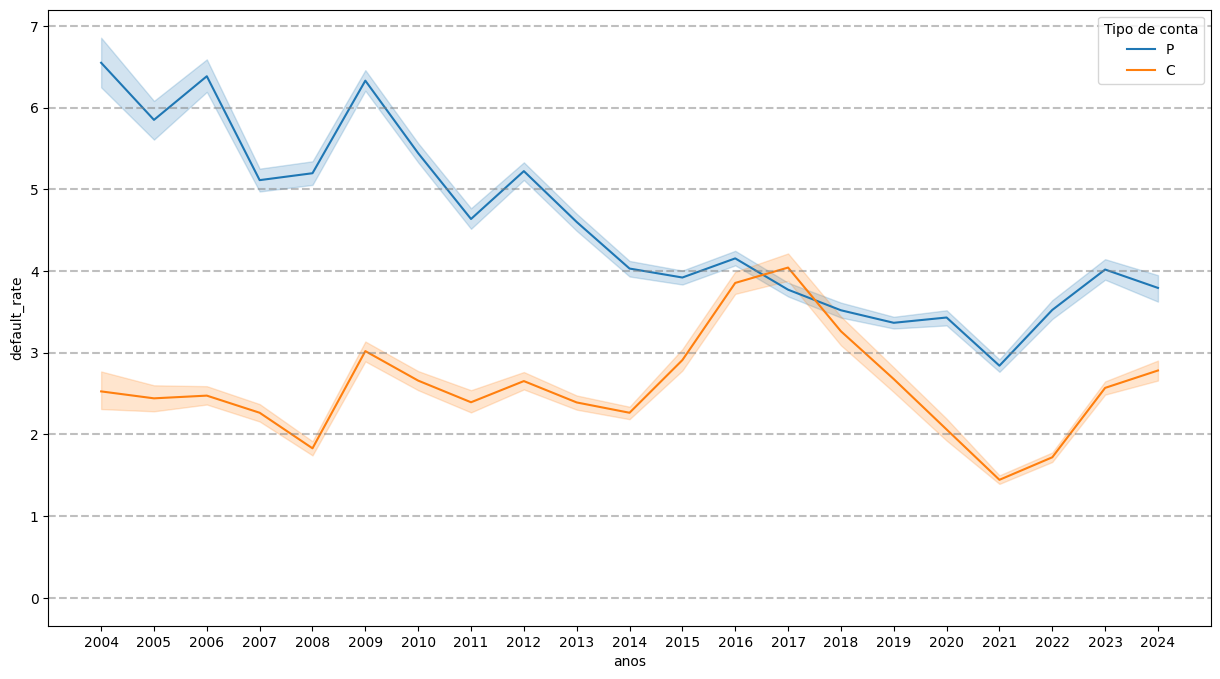

In [88]:
plt.figure(figsize=(15,8))

ax = sns.lineplot(data=dados,
                  x=dados['anos'],
                  y=dados['default_rate'],
                  hue=dados['person_or_corporation'],
                  estimator='mean',
                  markers=True)


#Obtendo valores de máximo e mínimo para o eixo y
x_max = ax.get_xlim()[1]
y_max = ax.get_ylim()[1]

#Criação das linhas no eixo y
for y in range(int(y_max) + 1):  # iterate sobre os valores inteiros do eixo y
    ax.axhline(y=y, linestyle='--', color='gray', alpha=0.5)
    

def pontos(x,y,color=None):
    for x,y in zip(x,y):
        ax.annotate(f'{y:.2f}',
                    xy=(x,y),
                    xytext=(-6,-4),
                    ha="right",
                    textcoords='offset points',
                    color=color
                    )
        

ax.legend(loc="upper right", title="Tipo de conta")
plt.show()